Business understanding
problem statement
data understanding

To perform data exploration, preprocessing, and predictive modeling, you will need to import several libraries in Python. Here are the necessary libraries:

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer


### Loading the dataset

In [158]:
# Importing the csv files
training_set_values = pd.read_csv("training_set_values.csv")
test_set_values = pd.read_csv("test_set_values.csv")
training_set_labels = pd.read_csv("training_set_labels.csv")



### Data Exploration.

In [159]:
# Explore the structure of training_set_values
print(training_set_values.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [160]:
# Explore the first few rows of the dataset
print(training_set_values.head())

      id  amount_tsh date_recorded        funder  gps_height     installer  \
0  69572      6000.0    14/03/2011         Roman        1390         Roman   
1   8776         0.0    06/03/2013       Grumeti        1399       GRUMETI   
2  34310        25.0    25/02/2013  Lottery Club         686  World vision   
3  67743         0.0    28/01/2013        Unicef         263        UNICEF   
4  19728         0.0    13/07/2011   Action In A           0       Artisan   

   longitude   latitude              wpt_name  num_private  ... payment_type  \
0  34.938093  -9.856322                  none            0  ...     annually   
1  34.698766  -2.147466              Zahanati            0  ...    never pay   
2  37.460664  -3.821329           Kwa Mahundi            0  ...   per bucket   
3  38.486161 -11.155298  Zahanati Ya Nanyumbu            0  ...    never pay   
4  31.130847  -1.825359               Shuleni            0  ...    never pay   

  water_quality quality_group      quantity  quant

In [161]:
# Summary statistics of numerical features
print(training_set_values.describe())

                 id     amount_tsh    gps_height     longitude      latitude  \
count  59400.000000   59400.000000  59400.000000  59400.000000  5.940000e+04   
mean   37115.131768     317.650385    668.297239     34.077427 -5.706033e+00   
std    21453.128371    2997.574558    693.116350      6.567432  2.946019e+00   
min        0.000000       0.000000    -90.000000      0.000000 -1.164944e+01   
25%    18519.750000       0.000000      0.000000     33.090347 -8.540621e+00   
50%    37061.500000       0.000000    369.000000     34.908743 -5.021597e+00   
75%    55656.500000      20.000000   1319.250000     37.178387 -3.326156e+00   
max    74247.000000  350000.000000   2770.000000     40.345193 -2.000000e-08   

        num_private   region_code  district_code    population  \
count  59400.000000  59400.000000   59400.000000  59400.000000   
mean       0.474141     15.297003       5.629747    179.909983   
std       12.236230     17.587406       9.633649    471.482176   
min        0.00

In [162]:
# Summary statistics of categorical features
print(training_set_values.describe(include=['object']))


       date_recorded                  funder installer wpt_name  \
count          59400                   55765     55745    59400   
unique           356                    1897      2145    37400   
top       15/03/2011  Government Of Tanzania       DWE     none   
freq             572                    9084     17402     3563   

                basin subvillage  region     lga   ward public_meeting  ...  \
count           59400      59029   59400   59400  59400          56066  ...   
unique              9      19287      21     125   2092              2  ...   
top     Lake Victoria   Madukani  Iringa  Njombe  Igosi           True  ...   
freq            10248        508    5294    2503    307          51011  ...   

       payment_type water_quality quality_group quantity quantity_group  \
count         59400         59400         59400    59400          59400   
unique            7             8             6        5              5   
top       never pay          soft          

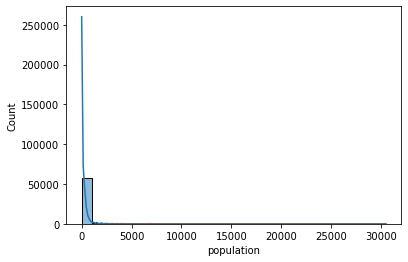

In [163]:
# Visualize distributions of numerical features
sns.histplot(data=training_set_values['population'], bins=30, kde=True)
plt.show()


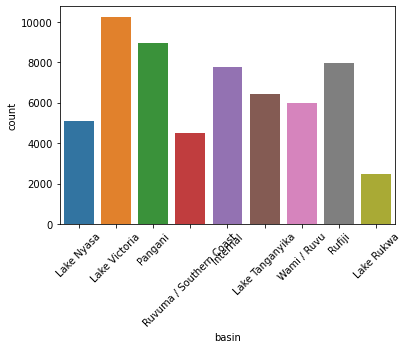

In [164]:
# Visualize distributions of categorical features
sns.countplot(data=training_set_values, x='basin')
plt.xticks(rotation=45)
plt.show()


### Handling Missing Values.

In [165]:
# Check for missing values
print(training_set_values.isnull().sum())


id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

#### Handling Missing values for different categories.

In [166]:
# Impute missing values for categorical columns with the mode
categorical_columns = ['funder', 'installer', 'scheme_management', 'permit']
for column in categorical_columns:
    training_set_values[column].fillna(training_set_values[column].mode()[0], inplace=True)

# Impute missing values for numerical columns with the median
training_set_values['construction_year'].fillna(training_set_values['construction_year'].median(), inplace=True)

# Impute missing values for boolean columns with a new category
boolean_columns = ['permit']
for column in boolean_columns:
    training_set_values[column].fillna('Unknown', inplace=True)



#### Check for missing values in the dataset

In [167]:
# Check for missing values in the updated dataset
missing_values_count = training_set_values.isnull().sum()
print(missing_values_count)


id                           0
amount_tsh                   0
date_recorded                0
funder                       0
gps_height                   0
installer                    0
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management            0
scheme_name              28166
permit                       0
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [168]:
### Dropping columns which are unnecessary.

columns_to_drop = ['wpt_name', 'num_private', 'subvillage', 'district_code', 'lga', 'ward', 
                   'public_meeting', 'recorded_by', 'scheme_name', 'extraction_type_group', 
                   'extraction_type_class', 'management_group', 'payment_type', 'quality_group', 
                   'quantity_group', 'source_type', 'source_class', 'waterpoint_type']

# Drop the specified columns
training_set_values.drop(columns=columns_to_drop, inplace=True)


In [169]:
remaining_columns = training_set_values.columns
print(remaining_columns)


Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'basin', 'region', 'region_code',
       'population', 'scheme_management', 'permit', 'construction_year',
       'extraction_type', 'management', 'payment', 'water_quality', 'quantity',
       'source', 'waterpoint_type_group'],
      dtype='object')


## Feature Engineering.

In [170]:
# Calculate the age of the waterpoint
current_year = pd.Timestamp.now().year
training_set_values['age'] = current_year - training_set_values['construction_year']

# Drop the 'construction_year' column
training_set_values.drop(columns=['construction_year'], inplace=True)



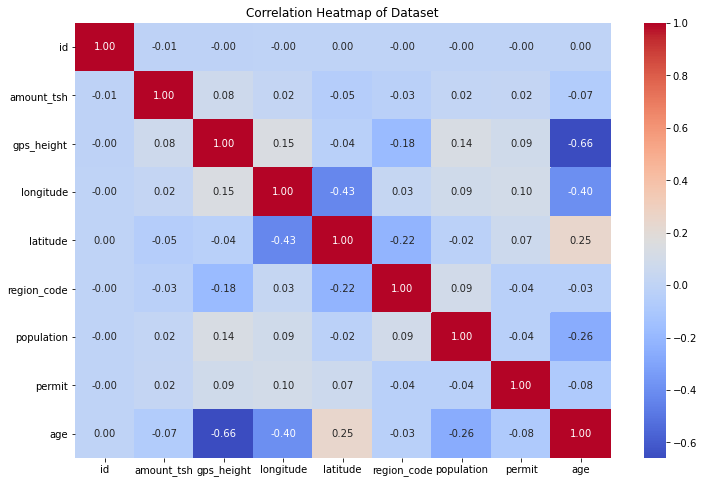

In [171]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the dataset
plt.figure(figsize=(12, 8))
sns.heatmap(training_set_values.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Dataset')
plt.show()


##### Categorical Columns (e.g., funder, installer, basin, etc.):
For categorical columns, we'll encode them using one-hot encoding to convert them into a format suitable for machine learning algorithms.
In the provided code we'll use OneHotEncoder from scikit-learn to encode categorical columns into binary vectors.This will create binary columns for each category within each categorical feature.

In [172]:
# Encode categorical columns using OneHotEncoder
encoder = OneHotEncoder(sparse=True, handle_unknown='ignore')
encoded_categorical = encoder.fit_transform(training_set_values[categorical_columns])

# Get the encoded column names
encoded_column_names = []
for i, column in enumerate(encoder.categories_):
    for category in column:
        encoded_column_names.append(f"{categorical_columns[i]}_{category}")

# Convert the encoded categorical data back to DataFrame with custom column names
encoded_categorical_df = pd.DataFrame.sparse.from_spmatrix(encoded_categorical, columns=encoded_column_names)


In [173]:
# Replace 'True' and 'False' with 1 and 0, respectively, for boolean columns
training_set_values['permit'] = training_set_values['permit'].map({'True': 1, 'False': 0})
